In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
def create_dataset(n, w):
    # n: sample size
    # w: boundary line coefs (intercept, slope1, slope2)
    wlen = np.sqrt(np.sum(np.inner(w, w)))
    f = lambda x: np.sign(np.inner(w/wlen, np.concatenate(([1], x))))
    X = np.random.uniform(-1, 1, size=(n, 2))
    y = np.apply_along_axis(f, 1, X)
    return X, y


def line(coefs):
    if coefs[2] > 0:
        x1 = np.array([-1, 1])
        x2 = (lambda x: -(coefs[0] + coefs[1] * x) / coefs[2])(x1)
    elif coefs[1] > 0:
        x2 = np.array([-1, 1])
        x1 = (lambda x: -(coefs[0] + coefs[2] * x) / coefs[1])(x2)
    else:
        x1 = [-1, 1]
        x2 = [-1,-1]
    return (x1, x2)

(-1, 1)

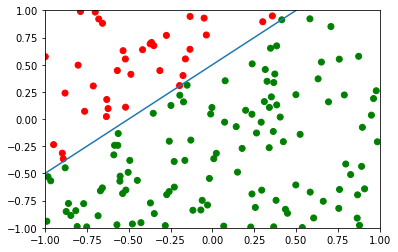

In [3]:
true_coefs = [1, 2, -2]
X, y = create_dataset(150, true_coefs)


plt.scatter(X[:, 0], X[:, 1], c=np.where(y>0, 'green', 'red'))
plt.plot(*line(true_coefs))
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [4]:
class Perceptron():
    def __init__(self):
        self.w = np.zeros(3, dtype=float)
        
    def predict(self, X):
        XX = np.hstack((np.ones(len(X)).reshape((-1, 1)), X))
        y = np.sign(np.dot(XX, self.w))
        return y
    
    def fit(self, X, y, collect_weights=False):
        weights = []
        steps = 0
        while(True):
            if collect_weights:
                weights.append(self.w.copy())
            else:
                steps += 1
                
            y_ = self.predict(X)
            err_idx = y_ != y
            
            if sum(err_idx) == 0:
                break
                
            errX = X[err_idx]
            errY = y[err_idx]
            rand_idx = np.random.randint(0, len(errX))
            self.adjust_weights(errX[rand_idx], errY[rand_idx])
            
        return np.array(weights) if collect_weights else steps
    
        
    def adjust_weights(self, x, y):
        self.w += np.concatenate(([1], x)) * y       

Fitting the data and visualizing the first 25 steps

Converged in 98 steps


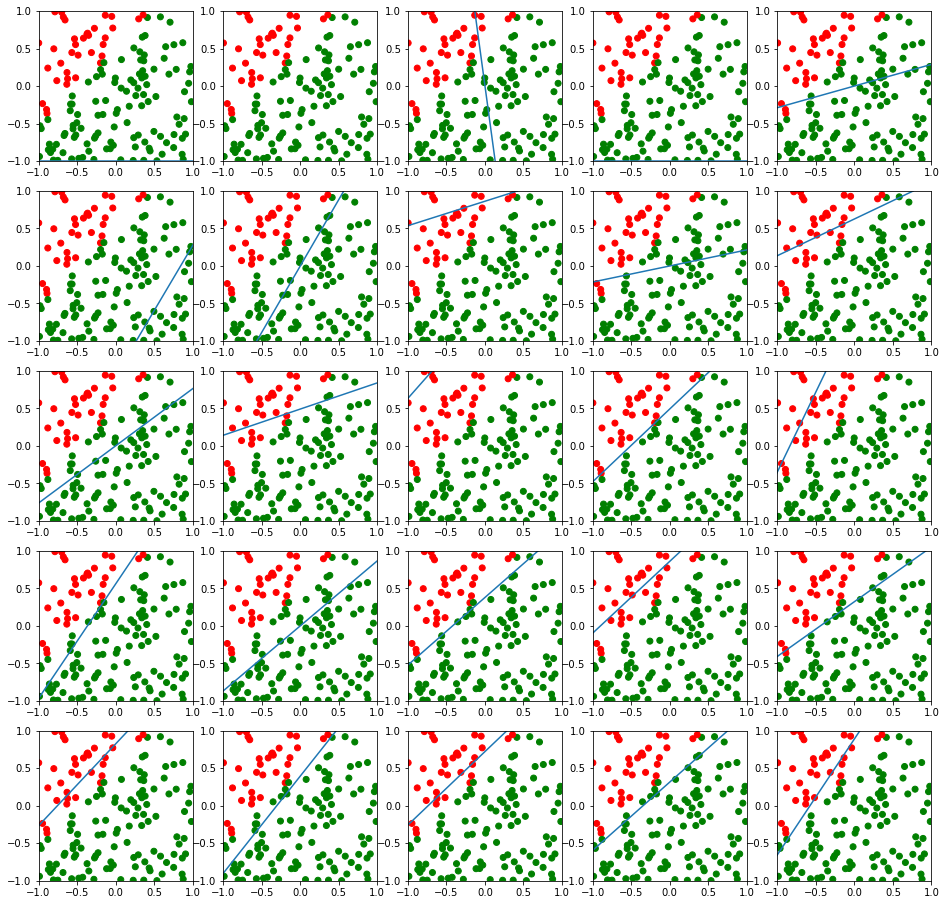

In [5]:
p = Perceptron()
weights = p.fit(X, y, collect_weights=True)
print("Converged in %d steps" % len(weights))

XX = np.hstack((np.ones(len(X)).reshape((-1, 1)), X))
yy = np.dot(weights, XX.T)
fig, axes = plt.subplots(5, 5, figsize=(16, 16))


for i in range(25):
    if i >= len(weights): 
        break
        
    ax = axes[i//5][i%5]
    ax.scatter(X[:, 0], X[:, 1], c=np.where(y>0, 'green', 'red'))
    ax.plot(*line(weights[i]))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

Now averaging convergence speed from 1000 trials

For N = 10

In [11]:
true_coefs = [1, 2, -2]
X, y = create_dataset(10, true_coefs)

trials = 1000
steps = 0
errors = []
testX, testY = create_dataset(100000, true_coefs)

for trial in range(trials):
    p = Perceptron()
    steps += p.fit(X, y)
    yhat = p.predict(testX)
    err = yhat != testY
    errors.append(1.0 * sum(err.astype(int)) / len(testY))

print("average convergence: %f" % (steps / trials))
print("average test error ~= %f" % np.average(errors))

average convergence: 17.664000
average test error ~= 0.048139


For N = 100

In [12]:
true_coefs = [1, 2, -2]
X, y = create_dataset(100, true_coefs)

trials = 1000
steps = 0
errors = []
testX, testY = create_dataset(100000, true_coefs)

for trial in range(trials):
    p = Perceptron()
    steps += p.fit(X, y)
    yhat = p.predict(testX)
    err = yhat != testY
    errors.append(1.0 * sum(err.astype(int)) / len(testY))

print("average convergence: %f" % (steps / trials))
print("average test error ~= %f" % np.average(errors))

average convergence: 61.980000
average test error ~= 0.009064
